In [59]:
import matplotlib.pyplot as plt

In [116]:
p1 = 100
p2 = 600
p3 = 150
start = 0.0  
end = 1.5
Nt = 10000
h = (end-start)/float(Nt)

t_array = []
es_array = []
e_array = []
s_array = []
p_array = []
dpdt_array = []

for i in range(0, Nt):
    t_array.append(i*(end-start)/float(Nt))

# 起始浓度
es_array.append(0.0)
e_array.append(1.0)
s_array.append(175.0)
p_array.append(0.0)


def func_ES(t, es, e, s, p): return p1*e*s-p2*es-p3*es
def func_E(t, es, e, s, p): return p2*es-p1*e*s+p3*es
def func_S(t, es, e, s, p): return p2*es-p1*e*s
def func_P(t, es, e, s, p): return p3*es


for i in range(0, Nt-1):
    K1_ES = func_ES(t_array[i], es_array[i],
                    e_array[i], s_array[i], p_array[i])
    K1_E = func_E(t_array[i], es_array[i], e_array[i], s_array[i], p_array[i])
    K1_S = func_S(t_array[i], es_array[i], e_array[i], s_array[i], p_array[i])
    K1_P = func_P(t_array[i], es_array[i], e_array[i], s_array[i], p_array[i])

    tmp_es = es_array[i]+h/2*K1_ES
    tmp_e = e_array[i]+h/2*K1_E
    tmp_s = s_array[i]+h/2*K1_S
    tmp_p = p_array[i]+h/2*K1_P

    K2_ES = func_ES(t_array[i] + h / 2, tmp_es, tmp_e, tmp_s, tmp_p)
    K2_E = func_E(t_array[i] + h / 2, tmp_es, tmp_e, tmp_s, tmp_p)
    K2_S = func_S(t_array[i] + h / 2, tmp_es, tmp_e, tmp_s, tmp_p)
    K2_P = func_P(t_array[i] + h / 2, tmp_es, tmp_e, tmp_s, tmp_p)

    tmp_es = es_array[i]+h/2*K2_ES
    tmp_e = e_array[i]+h/2*K2_E
    tmp_s = s_array[i]+h/2*K2_S
    tmp_p = p_array[i]+h/2*K2_P

    K3_ES = func_ES(t_array[i] + h / 2, tmp_es, tmp_e, tmp_s, tmp_p)
    K3_E = func_E(t_array[i] + h / 2, tmp_es, tmp_e, tmp_s, tmp_p)
    K3_S = func_S(t_array[i] + h / 2, tmp_es, tmp_e, tmp_s, tmp_p)
    K3_P = func_P(t_array[i] + h / 2, tmp_es, tmp_e, tmp_s, tmp_p)

    tmp_es = es_array[i]+h*K3_ES
    tmp_e = e_array[i]+h*K3_E
    tmp_s = s_array[i]+h*K3_S
    tmp_p = p_array[i]+h*K3_P

    K4_ES = func_ES(t_array[i] + h / 2, tmp_es, tmp_e, tmp_s, tmp_p)
    K4_E = func_E(t_array[i] + h / 2, tmp_es, tmp_e, tmp_s, tmp_p)
    K4_S = func_S(t_array[i] + h / 2, tmp_es, tmp_e, tmp_s, tmp_p)
    K4_P = func_P(t_array[i] + h / 2, tmp_es, tmp_e, tmp_s, tmp_p)

    es_array.append(es_array[i] + h / 6 *
                    (K1_ES + 2 * K2_ES + 2 * K3_ES + K4_ES))
    e_array.append(e_array[i] + h / 6 * (K1_E + 2 * K2_E + 2 * K3_E + K4_E))
    s_array.append(s_array[i] + h / 6 * (K1_S + 2 * K2_S + 2 * K3_S + K4_S))
    p_array.append(p_array[i] + h / 6 * (K1_P + 2 * K2_P + 2 * K3_P + K4_P))

for index in range(0, Nt-1):
    dpdt_array.append((p_array[index+1]-p_array[index])/h)

In [ ]:
#print("序号\tt\tes\te\ts\tp\tdp/dt")
#for index in range(0, Nt-1):
#    print(index, '\t', t_array[index], '\t', es_array[index], '\t', e_array[index],
#          '\t', s_array[index], '\t', p_array[index], '\t', dpdt_array[index])

In [117]:
es_array.__delitem__(Nt-1)
e_array.__delitem__(Nt-1)
s_array.__delitem__(Nt-1)
p_array.__delitem__(Nt-1)
t_array.__delitem__(Nt-1)

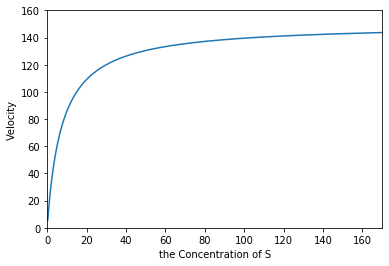

In [120]:
# 以s为横轴，dp/dt为纵轴
plt.plot(s_array, dpdt_array)
plt.xlabel("the Concentration of S")
plt.ylabel("Velocity")
plt.xlim(0, 170)
plt.ylim(0, 160)
plt.show()